In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
from scipy import stats
from scipy import signal

In [2]:
# Pathways
source = r"E:\Downloads\MothAbdominal\Centroids_Trimmed"
figpath = r"E:\Downloads\MothAbdominal\Tortuosity"

In [3]:
csv_list = glob.glob(source + '/*_*.csv')
csv_list[0][45:]

'Experimental_1_0_52688.csv'

In [4]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

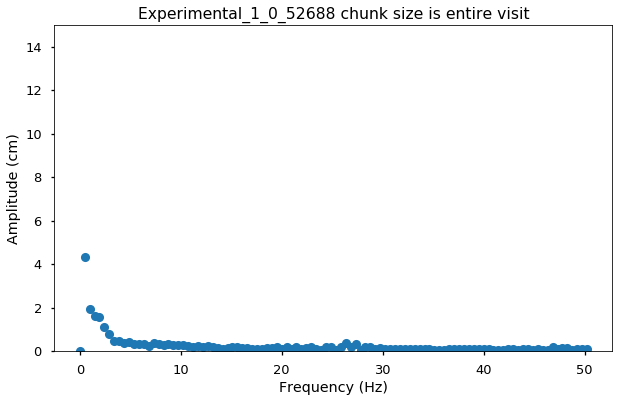

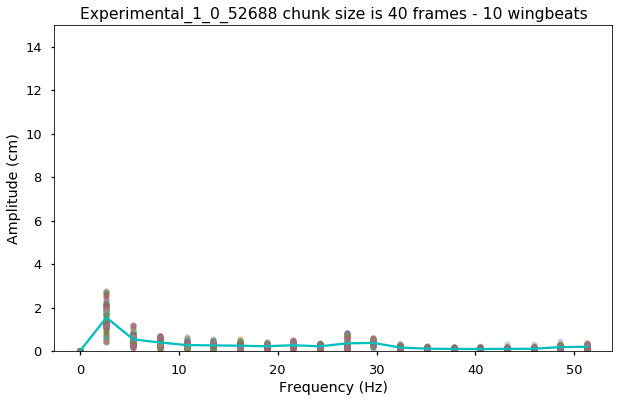

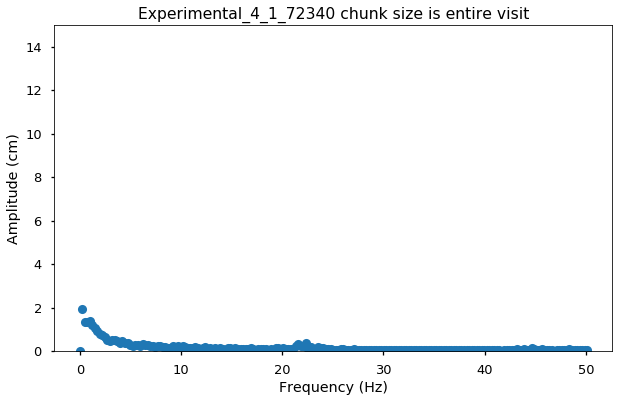

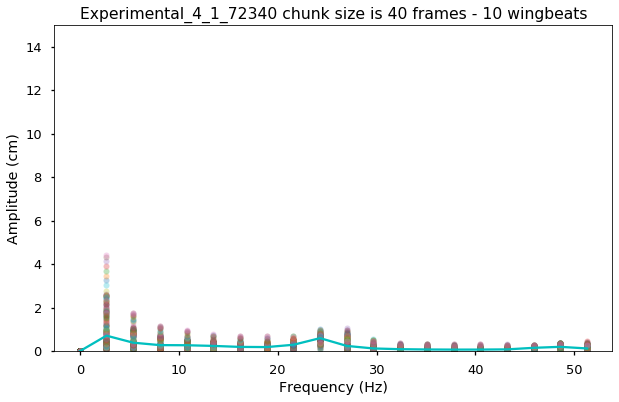

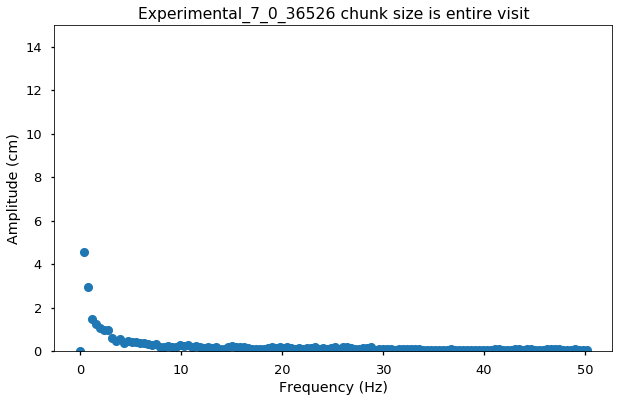

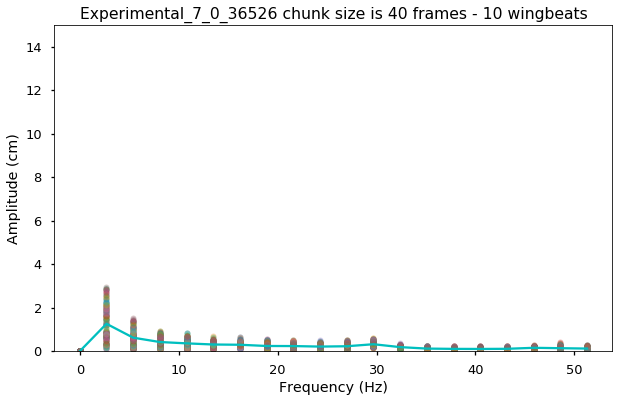

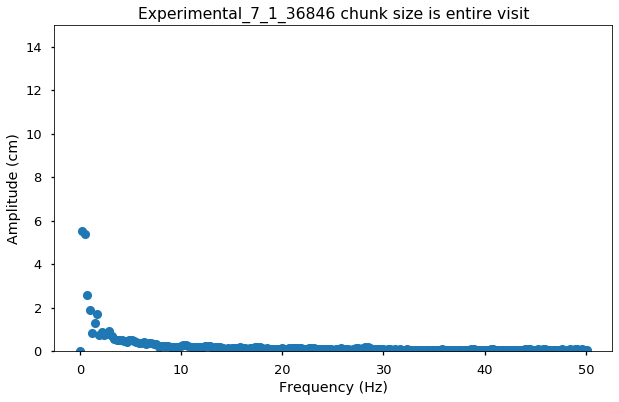

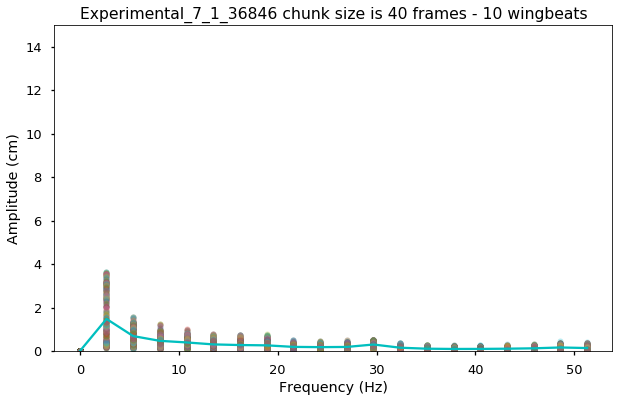

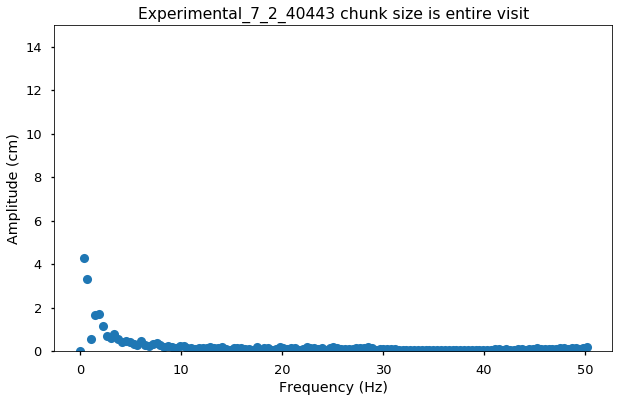

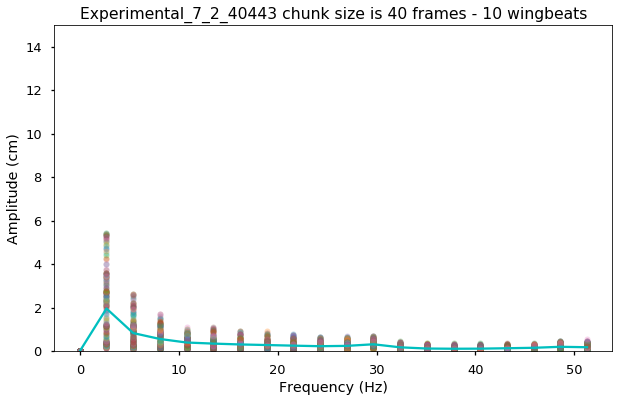

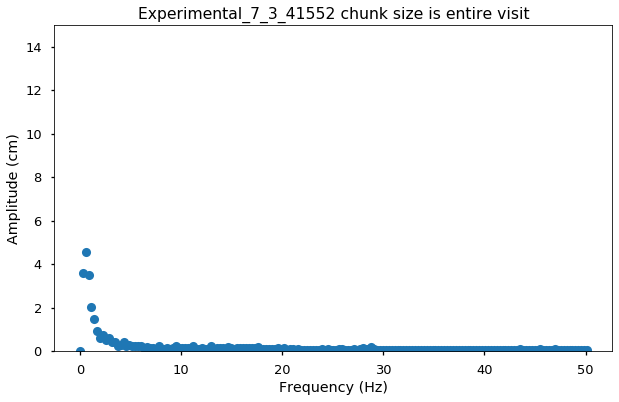

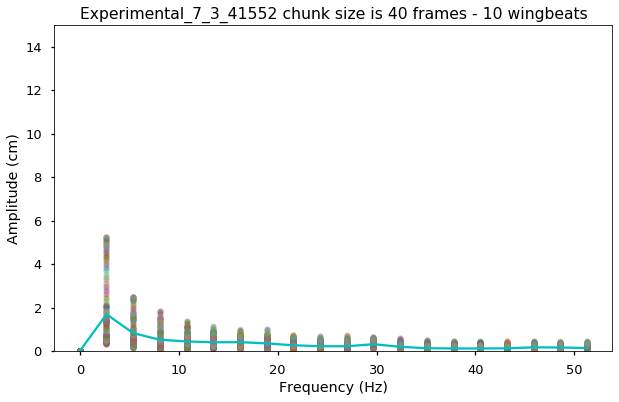

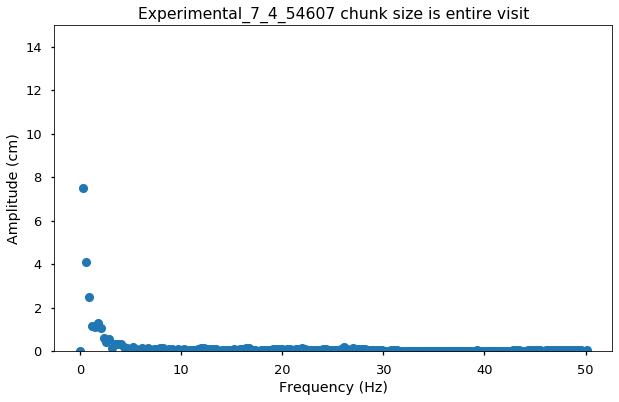

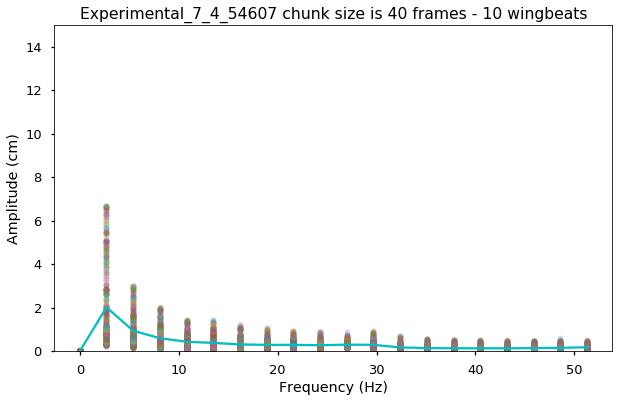

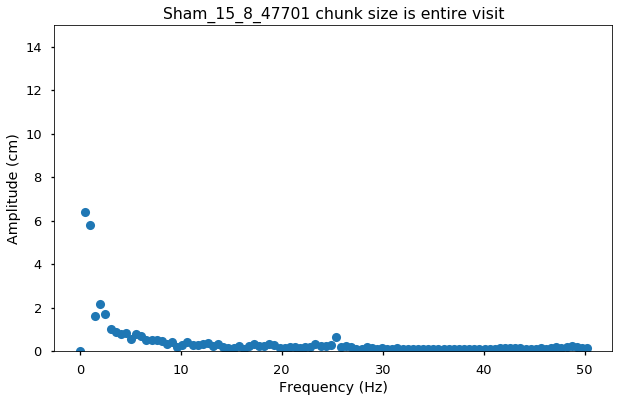

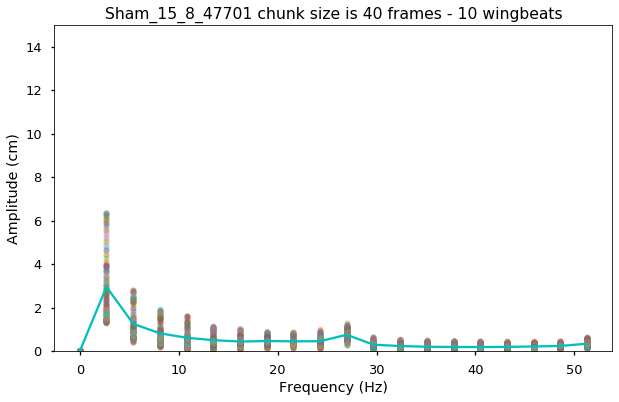

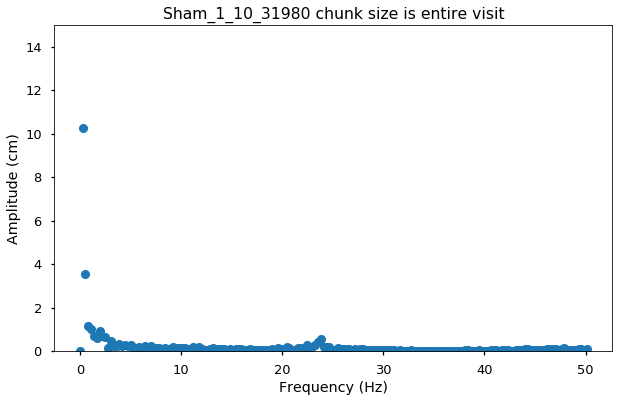

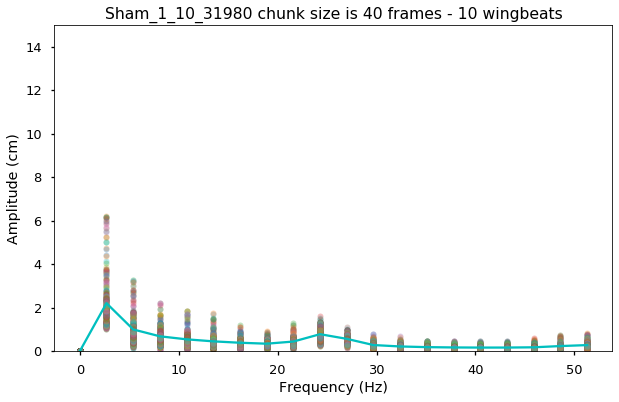

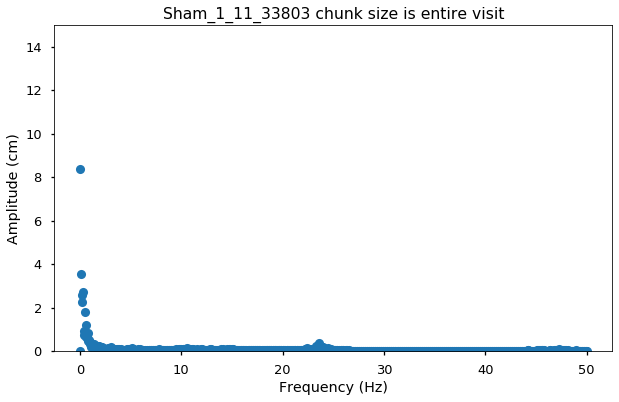

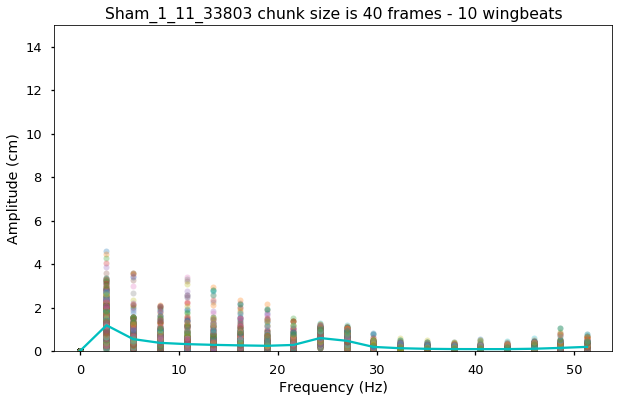

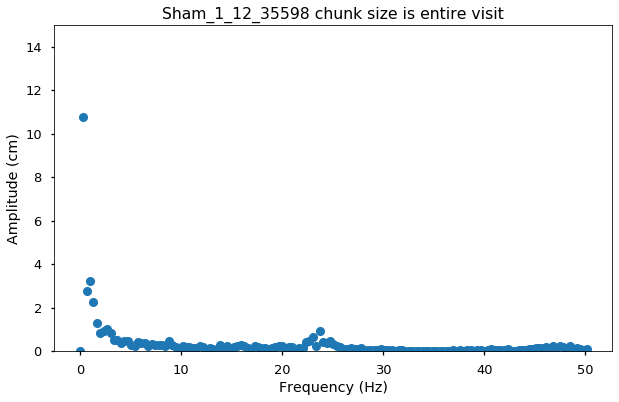

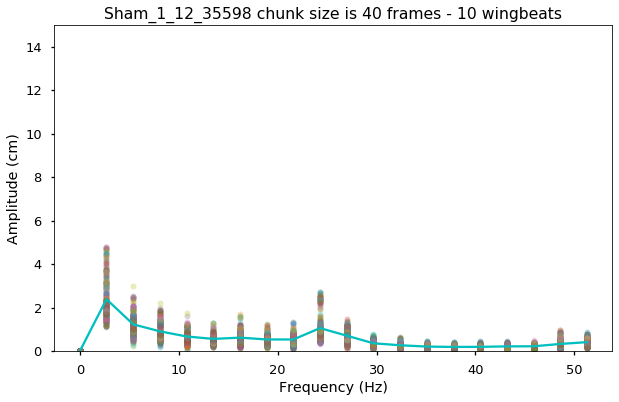

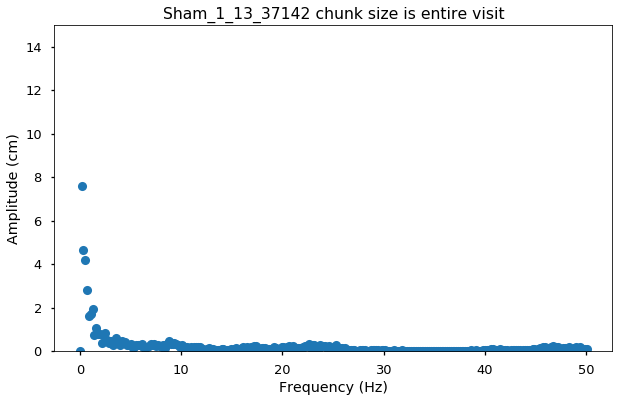

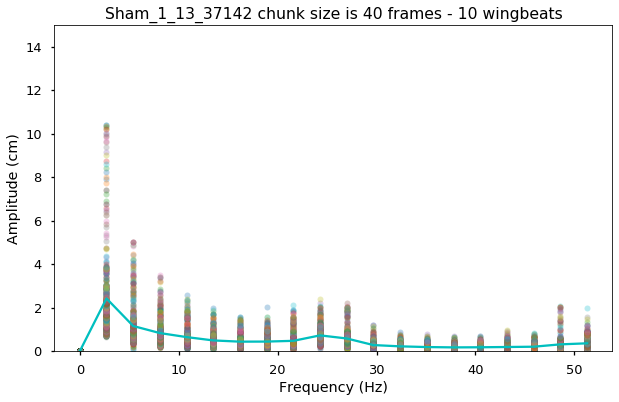

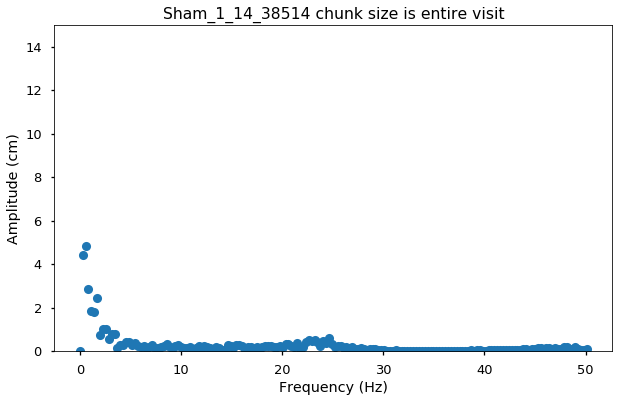

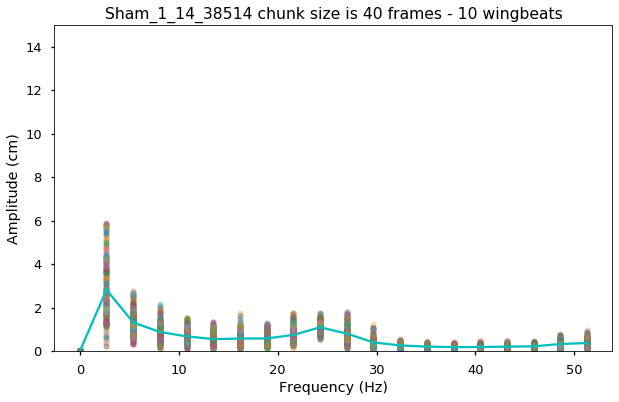

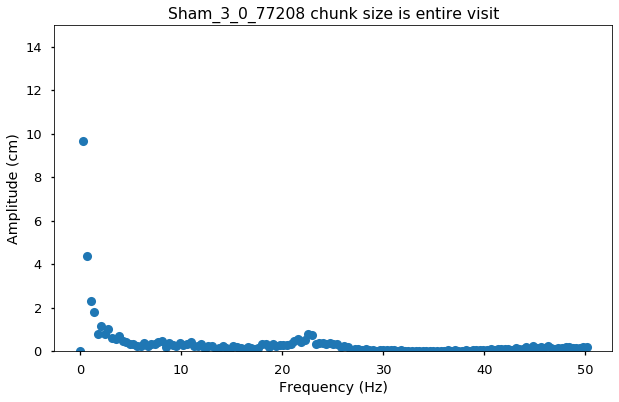

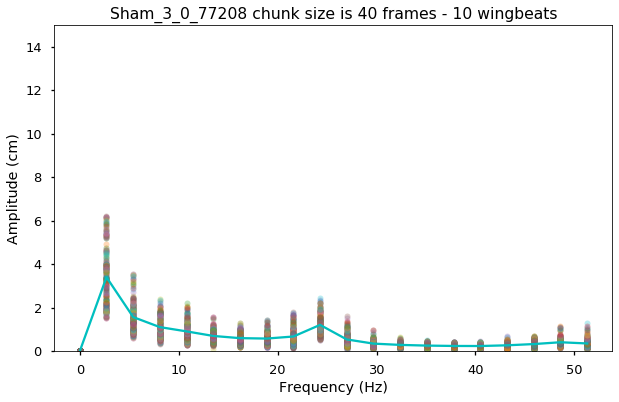

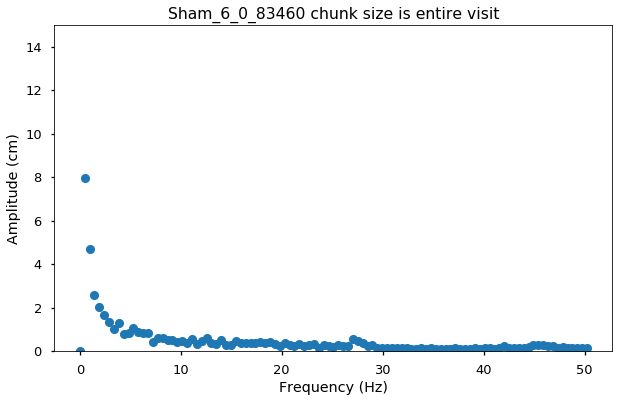

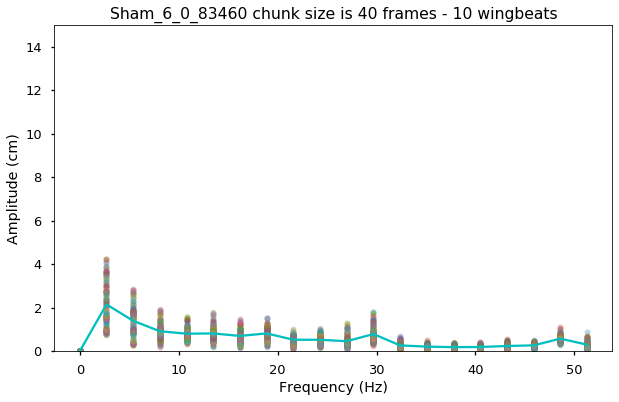

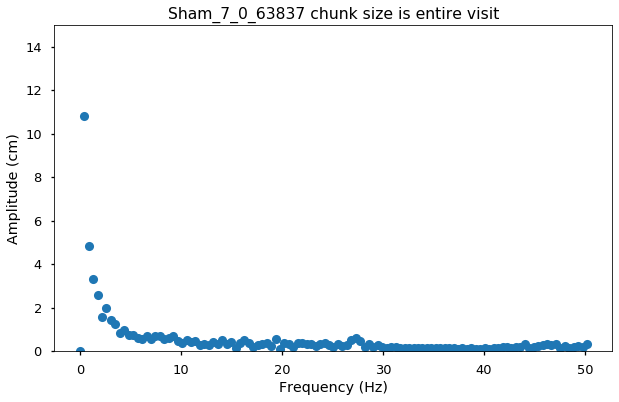

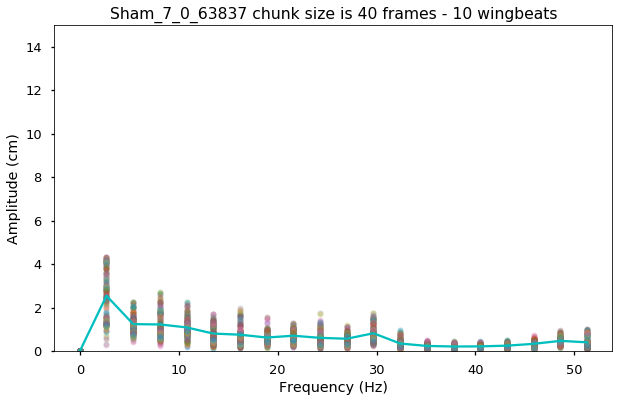

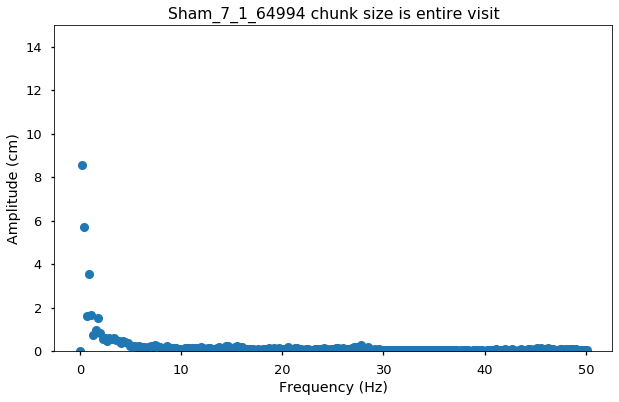

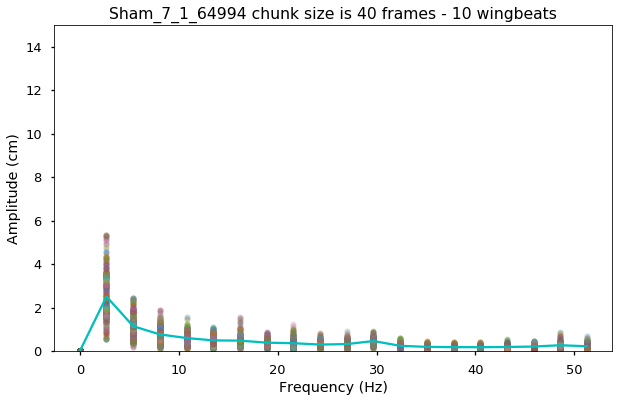

In [5]:
mean_list = []
std_list = []
visit_list = []
name_list = []
chunk = 40
trouble = []
fh_means,sh_means = [], []
fh_stds, sh_stds = [], []
f_s_ratio_means, f_s_ratio_stds = [], []

for ele in csv_list:
    df = pd.read_csv(ele)
   

 
        
    visit = df.VisitNumber[0]
    visit_list.append(visit)
    x, y, time = df.X_position.values, df.Y_position.values, df.FrameNumber.values
    


    if ele[45:].startswith("Sham_1_10"):
        x,y, time = x[240:600], y[240:600], time[240:600]
    elif ele[45:].startswith("Sham_15_8"):
        x,y, time = x[400:600], y[400:600], time[400:600]
    elif ele[45:].startswith("Sham_6_0"):
        x,y, time = x[10:220], y[10:220], time[10:220]
          
    
    
    x_, N_, fft_ = Tortuosity(x, time)
    y_, N__, fft__ = Tortuosity(y, time)
    sum_ = ((2.0/N__ * np.abs(fft__[0:N__//2])) + (2.0/N_ * np.abs(fft_[0:N_//2])))
    
    plt.figure(figsize=(10,6))
    
    plt.title(ele[45:-4] + " chunk size is entire visit")
    plt.ylim(0,15)
    plt.ylabel("Amplitude (cm)")
    plt.xlabel("Frequency (Hz)")
    
    plt.plot(x_, sum_, "o")
    
    plt.savefig(figpath + "/Entire_" + ele[45:-4] + ".png")
    
    n = np.arange(0,len(x)-chunk,1)
    ratio_list = []
    plt.figure(figsize=(10,6))
    sum_count = chunk//2*[0]

    for element in n:


        shortest_path = np.sqrt((x[element+chunk]-x[element])**2 + (y[element+chunk]-y[element])**2)


        actual_list = 0
        i = 0
        while i < len(x[element:element+chunk]):



            actual_path = np.sqrt((x[element:element+chunk+1][i+1]-x[element:element+chunk+1][i])**2 + (y[element:element+chunk+1][i+1]-y[element:element+chunk+1][i])**2)
            actual_list += actual_path



            i +=1
        
        
        
        
    
        
        

        xf, Nx, fftx = Tortuosity(x[element:element+chunk], time[element:element+chunk])
        yf, Ny, ffty = Tortuosity(y[element:element+chunk], time[element:element+chunk])
        sum_xy = ((2.0/Ny * np.abs(ffty[0:Ny//2])) + (2.0/Nx * np.abs(fftx[0:Nx//2])))
        
        
        
        sum_count += sum_xy
        
        
        
        plt.title(ele[45:-4] + " chunk size is 40 frames - 10 wingbeats")
        plt.ylim(0,15)
        plt.ylabel("Amplitude (cm)")
        plt.xlabel("Frequency (Hz)")
        plt.plot(xf, sum_xy, "o", ms = 6, alpha = 0.3)
        
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
    
    first_half, second_half = sum_count[1:10]/(element), (sum_count[10:-1]/(element))
    f_s_ratio = second_half/first_half
    f_s_ratio_means.append(np.mean(f_s_ratio))
    f_s_ratio_stds.append(np.std(f_s_ratio))
    fh_means.append(np.mean(first_half)), sh_means.append(np.mean(second_half))
    fh_stds.append(np.std(first_half)), sh_stds.append(np.std(second_half))
    plt.plot(xf, sum_count/(element+1), c = "c")
    name_list.append(ele[45:-4])
    finite = np.asarray(ratio_list)[~np.isinf(ratio_list)]
    mean = np.mean(finite)
    std = np.std(finite)
    mean_list.append(mean)
    std_list.append(std)
    
    
    
    if ~np.isfinite(np.mean(ratio_list)) or len(finite) < (200-chunk):
        trouble.append((ele[45:-4], csv_list.index(ele), len(x), len(np.asarray(ratio_list)[~np.isfinite(ratio_list)])))
        
    plt.savefig(figpath + "/" + ele[45:-4] + ".png")


In [6]:
list_ = [csv_list.index(source + "\\" + element[0] + ".csv") for element in trouble]
list_path = [csv_list[element] for element in list_]

In [7]:
names = []
for element in trouble:
    names.append(element[0])

In [8]:
#feed this into the mixed effects model in R
name_list_ = []
for name in name_list:
    if name.startswith('Sham'):
        name = name[:7]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('Experimental'):
        name = name[:15]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [9]:
condition = []
for name in name_list:
    if name.startswith("Sham"):
        condition.append("Sham")
    else:
        condition.append("Experimental")
condition

['Experimental',
 'Experimental',
 'Experimental',
 'Experimental',
 'Experimental',
 'Experimental',
 'Experimental',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham',
 'Sham']

In [10]:
len(mean_list),len(std_list), len(name_list), len(visit_list), len(fh_means), len(sh_means), len(fh_means), len(fh_stds), len(sh_stds), len(fh_stds)

(17, 17, 17, 17, 17, 17, 17, 17, 17, 17)

In [11]:
new_df = (pd.DataFrame({'name' : name_list, 
                        'std_tortuosity': std_list, 'mean_tortuosity' : mean_list, 'first_mean_amplitude': fh_means, 'second_mean_amplitude': sh_means, 'ratio_mean_amplitude': f_s_ratio_means, 
                        'condition': condition, 'visit_number': visit_list}))
new_df = new_df.sort_values(by=['name','visit_number'])
new_df.reset_index(drop=True, inplace=True)
new_df.to_csv(figpath + "\\tortuosity_values.csv")

In [12]:
new_df

,name,std_tortuosity,mean_tortuosity,first_mean_amplitude,second_mean_amplitude,ratio_mean_amplitude,condition,visit_number
0,Experimental_1,8.695083,12.163789,0.449174,0.183541,0.475918,Experimental,0
1,Experimental_4,38.460742,34.622607,0.354925,0.125703,0.362325,Experimental,1
2,Experimental_7,10.787475,9.682698,0.441692,0.164192,0.438001,Experimental,0
3,Experimental_7,48.038860,16.919756,0.479954,0.156725,0.434772,Experimental,1
4,Experimental_7,22.329259,13.182001,0.578757,0.177414,0.422977,Experimental,2
5,Experimental_7,18.163859,13.863883,0.578976,0.180884,0.398603,Experimental,3
6,Experimental_7,21.095690,11.598420,0.617679,0.179182,0.374048,Experimental,4
7,Sham_1,39.499350,15.731015,0.763750,0.242707,0.355718,Sham,10
8,Sham_1,30.626129,20.955578,0.462621,0.163849,0.351261,Sham,11
9,Sham_1,19.995821,16.264498,0.953477,0.305753,0.335344,Sham,12


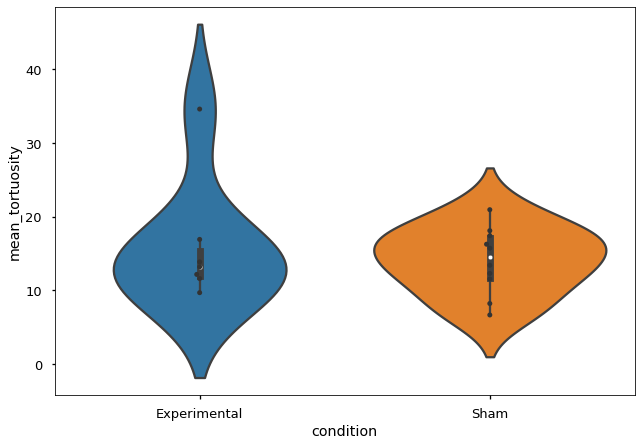

In [13]:
#need to add the original values to ground these comparisons

sns.violinplot(x="condition", y="mean_tortuosity",
                    data= new_df)
sns.swarmplot(x="condition", y="mean_tortuosity",
                    data=new_df, color="0.2")

In [14]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_mean_path = new_df[new_df.condition == "Sham"].mean_tortuosity.values
e_mean_path = new_df[new_df.condition == "Experimental"].mean_tortuosity.values
stats.f_oneway(s_mean_path, e_mean_path)

F_onewayResult(statistic=0.3801760255695854, pvalue=0.5467538409532565)

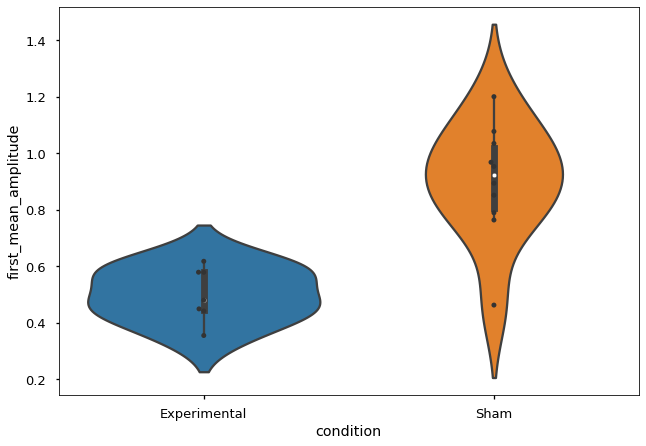

In [15]:
#need to add the original values to ground these comparisons

sns.violinplot(x="condition", y="first_mean_amplitude",
                    data= new_df)
sns.swarmplot(x="condition", y="first_mean_amplitude",
                    data=new_df, color="0.2")

In [16]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_f_amplitude = new_df[new_df.condition == "Sham"].first_mean_amplitude.values
e_f_amplitude = new_df[new_df.condition == "Experimental"].first_mean_amplitude.values
stats.f_oneway(s_f_amplitude, e_f_amplitude)

F_onewayResult(statistic=23.152508723477784, pvalue=0.00022858095328565672)

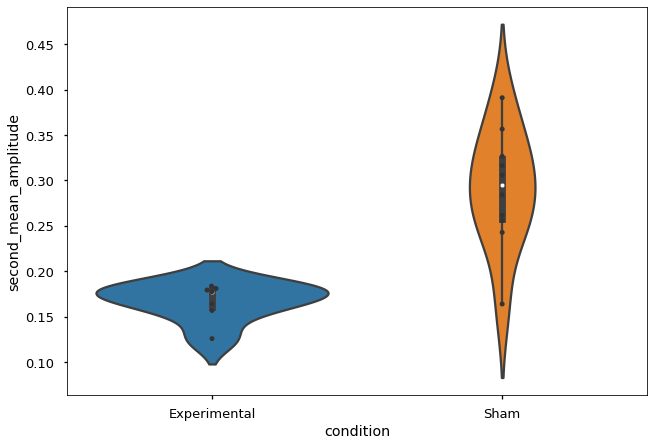

In [17]:
#need to add the original values to ground these comparisons

sns.violinplot(x="condition", y="second_mean_amplitude",
                    data= new_df)
sns.swarmplot(x="condition", y="second_mean_amplitude",
                    data=new_df, color="0.2")

In [18]:
#this method assumes each data point is independent. However, even under this assumption there are no significant differences 
s_s_amplitude = new_df[new_df.condition == "Sham"].second_mean_amplitude.values
e_s_amplitude = new_df[new_df.condition == "Experimental"].second_mean_amplitude.values
stats.f_oneway(s_s_amplitude, e_s_amplitude)

F_onewayResult(statistic=23.81401260472482, pvalue=0.00020001482775980502)

In [19]:
new_df

,name,std_tortuosity,mean_tortuosity,first_mean_amplitude,second_mean_amplitude,ratio_mean_amplitude,condition,visit_number
0,Experimental_1,8.695083,12.163789,0.449174,0.183541,0.475918,Experimental,0
1,Experimental_4,38.460742,34.622607,0.354925,0.125703,0.362325,Experimental,1
2,Experimental_7,10.787475,9.682698,0.441692,0.164192,0.438001,Experimental,0
3,Experimental_7,48.038860,16.919756,0.479954,0.156725,0.434772,Experimental,1
4,Experimental_7,22.329259,13.182001,0.578757,0.177414,0.422977,Experimental,2
5,Experimental_7,18.163859,13.863883,0.578976,0.180884,0.398603,Experimental,3
6,Experimental_7,21.095690,11.598420,0.617679,0.179182,0.374048,Experimental,4
7,Sham_1,39.499350,15.731015,0.763750,0.242707,0.355718,Sham,10
8,Sham_1,30.626129,20.955578,0.462621,0.163849,0.351261,Sham,11
9,Sham_1,19.995821,16.264498,0.953477,0.305753,0.335344,Sham,12
